In [12]:
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt
import soundfile as sf
from scipy.signal import butter, filtfilt
from IPython.display import Audio

In [13]:
# MENDAPATKAN JALUR LENGKAP KE FILE AUDIO
# Mendefinisikan nama file audio yang akan digunakan, dalam hal ini file audio bernama 'audio1.wav'.
audio_filename = 'audio1.wav'
# Menggunakan modul os untuk menggabungkan direktori kerja saat ini dengan nama file audio. Ini menghasilkan jalur lengkap ke file audio.
audio_path = os.path.join(os.getcwd(), audio_filename)

# MEMUAT FILE AUDIO
# Menggunakan modul librosa untuk memuat file audio dari jalur yang telah ditentukan sebelumnya. Fungsi load() mengembalikan dua nilai, yaitu audio_data yang berisi data audio sebagai array numpy, dan sr yang merupakan tingkat sampel (sample rate) dari file audio tersebut.
audio_data, sr = librosa.load(audio_path)

In [14]:
# MEMANMPILKAN AUDIO MENGGUNAKAN WIDGET AUDIO
# Menampilkan teks "Audio Asli:" ke output.
print('Audio Asli:')
# Membuat objek Audio menggunakan modul/widget yang sesuai untuk menampilkan audio. data adalah parameter yang berisi data audio yang ingin ditampilkan, sedangkan rate adalah parameter yang menyimpan tingkat sampel (sample rate) dari audio tersebut.
Audio(data=audio_data, rate=sr)

Audio Asli:


In [15]:
# Menerapkan filter bandpass pada sinyal audio untuk menghilangkan suara manusia.
def remove_human_voice(audio_signal, fs, lowcut, highcut):
    
    # NORMALISASI FREKUENSI CUTOFF
    # Melakukan normalisasi frekuensi cut-off dengan membagi frekuensi cut-off rendah dan tinggi dengan separuh frekuensi sampel (nyquist frequency) dari sinyal audio. Ini dilakukan untuk memastikan bahwa nilai frekuensi cut-off berada dalam rentang yang benar.
    nyquist_freq = 0.5 * fs
    low = lowcut / nyquist_freq
    high = highcut / nyquist_freq
    
    # MENERAPKAN FILTER BANDPASS
    # Menggunakan fungsi butter dari modul scipy.signal untuk merancang filter bandpass Butterworth orde 5. Filter ini akan memiliki respons frekuensi yang mengizinkan sinyal pada rentang frekuensi antara low dan high, dan menekan sinyal di luar rentang tersebut.
    b, a = butter(5, [low, high], btype='band')
    # Menerapkan filter bandpass yang telah dirancang ke sinyal audio menggunakan fungsi filtfilt dari modul scipy.signal. filtfilt melakukan filtrasi maju-mundur pada sinyal untuk menghindari efek fase yang merusak.
    filtered_audio = filtfilt(b, a, audio_signal)
    
    # Mengembalikan sinyal audio yang telah difilter.
    return filtered_audio


In [16]:
# Nilai-nilai yang dapat disesuaikan
lowcut = 2000  # Frekuensi cutoff rendah dalam Hz 
highcut = 11000  # Frekuensi cutoff tinggi dalam Hz 

In [17]:
# Menghilangkan suara manusia dari audio menggunakan filter bandpass
filtered_audio = remove_human_voice(audio_data, sr, lowcut, highcut)

Text(0.5, 1.0, 'Spektrogram Sebelum Pengurangan Suara Manusia')

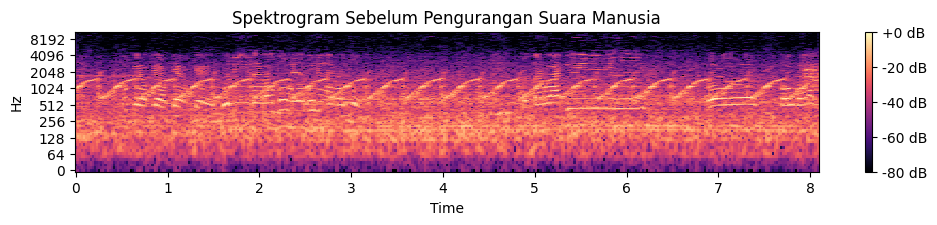

In [18]:
# MENAMPILKAN SPEKTOGRAM SEBELUM PENGURANAGN SUARA MANUSIA
# Membuat objek gambar dengan ukuran 12x4 inci untuk menampung plot yang akan dibuat.
plt.figure(figsize=(12, 4))
# Membuat subplot pertama dengan konfigurasi 2 baris dan 1 kolom, dan mengaktifkan subplot pertama untuk digunakan.
plt.subplot(2, 1, 1)
# Menghitung representasi spektrogram dari sinyal audio menggunakan fungsi stft dari modul librosa, kemudian mengubah amplitudonya menjadi skala desibel (dB) menggunakan fungsi amplitude_to_db. Hasilnya disimpan dalam variabel D_orig.
D_orig = librosa.amplitude_to_db(np.abs(librosa.stft(audio_data)), ref=np.max)
# Menampilkan spektrogram menggunakan fungsi specshow dari modul librosa.display. Parameter D_orig merupakan spektrogram yang ingin ditampilkan. x_axis='time' menandakan bahwa sumbu x akan menunjukkan waktu, sedangkan y_axis='log' menunjukkan bahwa sumbu y akan menggunakan skala logaritmik.
librosa.display.specshow(D_orig, x_axis='time', y_axis='log')
# Menampilkan colorbar pada plot dengan format label sebagai nilai dalam satuan dB.
plt.colorbar(format='%+2.0f dB')
# Memberikan judul pada subplot yang menunjukkan bahwa ini adalah spektrogram sebelum pengurangan suara manusia.
plt.title('Spektrogram Sebelum Pengurangan Suara Manusia')

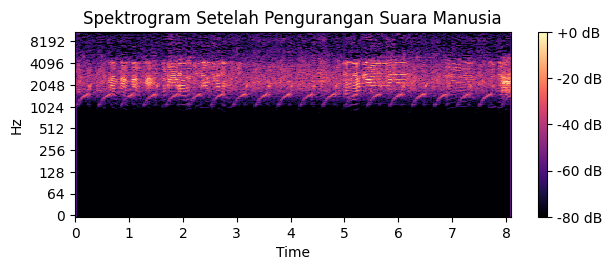

In [19]:
# MENAMPILKAN SPEKTOGRAM SETELAH PENGURANAGN SUARA MANUSIA
# Membuat subplot kedua dengan konfigurasi 2 baris dan 1 kolom, dan mengaktifkan subplot kedua untuk digunakan.
plt.subplot(2, 1, 2)
# Menghitung representasi spektrogram dari sinyal audio yang telah difilter menggunakan fungsi stft dari modul librosa, kemudian mengubah amplitudonya menjadi skala desibel (dB) menggunakan fungsi amplitude_to_db. Hasilnya disimpan dalam variabel D_filtered.
D_filtered = librosa.amplitude_to_db(np.abs(librosa.stft(filtered_audio)), ref=np.max)
# Menampilkan spektrogram yang telah difilter menggunakan fungsi specshow dari modul librosa.display. Parameter D_filtered merupakan spektrogram yang ingin ditampilkan. x_axis='time' menandakan bahwa sumbu x akan menunjukkan waktu, sedangkan y_axis='log' menunjukkan bahwa sumbu y akan menggunakan skala logaritmik.
librosa.display.specshow(D_filtered, x_axis='time', y_axis='log')
# Menampilkan colorbar pada plot dengan format label sebagai nilai dalam satuan dB.
plt.colorbar(format='%+2.0f dB')
# Memberikan judul pada subplot yang menunjukkan bahwa ini adalah spektrogram setelah pengurangan suara manusia.
plt.title('Spektrogram Setelah Pengurangan Suara Manusia')

# Menyesuaikan tata letak subplot secara otomatis untuk memastikan tampilan yang rapi.
plt.tight_layout()

In [20]:
# MENYIMPAN AUDIO HASIL PENGURANGAN SUARA AMBULAN
# Mendefinisikan variabel output_path yang berisi string 'audio_without_voice.wav'. Variabel ini merupakan path (lokasi dan nama file) di mana audio hasil pengurangan suara manusia akan disimpan. Anda dapat mengganti nilainya dengan path yang sesuai sesuai kebutuhan.
output_path = 'audio_without_voice.wav'  # Ganti dengan path untuk menyimpan audio hasil
# Menyimpan audio hasil pengurangan suara manusia ke file dengan menggunakan fungsi write dari modul soundfile. Parameter pertama output_path adalah path file output yang telah ditentukan sebelumnya. Parameter kedua filtered_audio adalah data audio hasil pengurangan suara manusia. Parameter ketiga sr adalah tingkat sampel (sample rate) dari audio tersebut. Parameter keempat format='wav' menunjukkan bahwa audio akan disimpan dalam format WAV.Dengan demikian, kode tersebut bertujuan untuk menyimpan audio hasil pen
sf.write(output_path, filtered_audio, sr, format='wav')

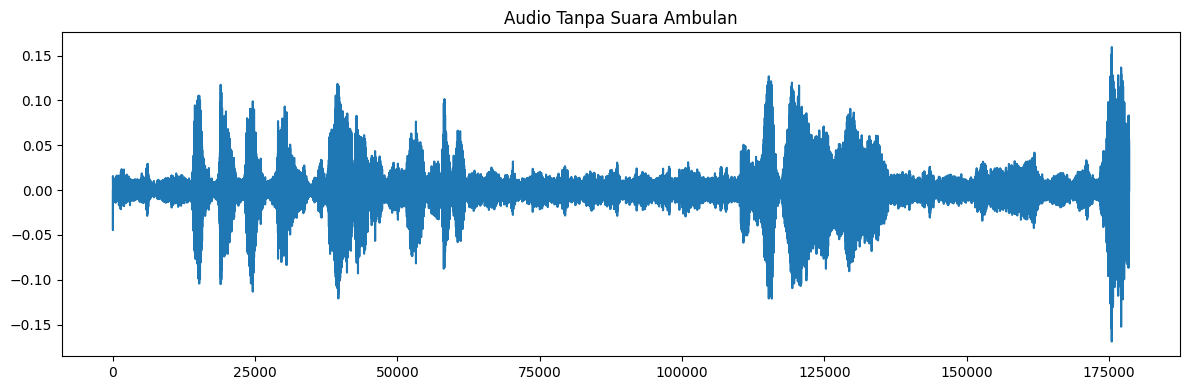

In [21]:
#MEMUAT DAN MENAMPILKAN AUDIO HASIL PENGURANGAN SUARA AMBULAN
# Memuat audio hasil pengurangan suara ambulan dari file yang telah disimpan sebelumnya menggunakan fungsi load dari modul librosa. Parameter output_path adalah path file yang berisi audio hasil pengurangan suara manusia. Hasil audio akan disimpan dalam variabel filtered_audio, dan tingkat sampel (sample rate) akan disimpan dalam variabel sr.
filtered_audio, sr = librosa.load(output_path)
# Membuat objek gambar dengan ukuran 12x4 inci untuk menampung plot yang akan dibuat.
plt.figure(figsize=(12, 4))
# Memberikan judul pada plot yang menunjukkan bahwa ini adalah audio tanpa suara ambulan.
plt.title('Audio Tanpa Suara Ambulan')
# Menampilkan plot garis dari audio tanpa suara ambulan. filtered_audio merupakan data audio yang telah dimuat sebelumnya.
plt.plot(filtered_audio)
#  Menyesuaikan tata letak plot secara otomatis untuk memastikan tampilan yang rapi.
plt.tight_layout()

# Menampilkan plot audio tanpa suara ambulan ke output.
plt.show()

In [22]:
# MENAMPILKAN AUDIO MENGGUNAKAN WIDGET AUDIO
# Menampilkan teks "Audio Hasil:" ke output.
print('Audio Hasil:')
# Membuat objek Audio menggunakan modul/widget yang sesuai untuk menampilkan audio. data adalah parameter yang berisi data audio yang telah difilter, yaitu filtered_audio, sedangkan rate adalah parameter yang menyimpan tingkat sampel (sample rate) dari audio tersebut.
Audio(data=filtered_audio, rate=sr)

Audio Hasil:
